In [1]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import glob
import os
import pandas as pd

from pyxlma.lmalib.io import read
from pyxlma.plot.xlma import XlmaPlot

%matplotlib inline

In [2]:
# filename = '/Users/vannac/Documents/oklma/viewer/testdata/active/LYLOUT_200412_022000_0060.dat.gz'
# lma_file = read.lmafile(filename)
# lma_data = lma_file.readfile()

In [3]:
# types = ('/var/www/html/lma/dec_data/{0}/??/??/*.gz'.format(cur.strftime('%y%m%d')),
#          '/var/www/html/lma/dec_data/{0}/??/??/*.gz'.format((cur-dt.timedelta(days=1)).strftime('%y%m%d')))

# files_grabbed = []
# for files in types:
#     files_grabbed.extend(glob.glob(files))

files_grabbed = glob.glob('../test/vanna/kinda/L*')

tfile = sorted(files_grabbed, key=os.path.getctime)[-1]

lma_data = pd.DataFrame()

starttime = None
for i in range(10):
    # print (sorted(files_grabbed, key=os.path.getctime)[-(i+2)])
    lma_file = read.lmafile(sorted(files_grabbed, key=os.path.getctime)[-(i+1)])
    if starttime is None:
        starttime = lma_file.starttime
    else:
        starttime = min(lma_file.starttime, starttime)
    # Accounting for empty files
    try:
        lma_data = lma_data.append(lma_file.readfile())
    except:
        pass

print(starttime)

# Station info comes from the last file read.
stations = lma_file.stations

# Will need to add logic to check for existing data and do something else if it is
if lma_data.size>0:
    lma_data.sort_values('Datetime', inplace=True)
    
dttuple = [starttime, starttime+dt.timedelta(minutes=10)]
# dttuple = lma_data.Datetime.min(), lma_data.Datetime.max()
tstring = 'Oklahoma LMA {}-{}'.format(dttuple[0].strftime('%H%M'),
                                      dttuple[1].strftime('%H%M UTC %d %B %Y '))


2020-04-02 23:00:00


In [4]:
N_events = lma_data.shape[0]
N_stations = lma_file.stations.shape[0]
print(N_events, N_stations, lma_file.stations.shape)


35436 18 (18, 12)


In [5]:
lma_data

,time (UT sec of day),Datetime,lat,lon,alt(m),reduced chi^2,P(dBW),mask,Station Count,Z_Zombie,...,W_Minco W,N_Newcastle,M_Middleberg,L_Goldsby S,I_Minco SE,H_Chickasha N,G_Goldsby,E_El Reno,D_Dutton,C_Chickasha SE
0,82800.749080,2020-04-02 23:00:00.749079563,35.378869,-99.740412,11685.61,0.05,12.9,0x003f7,9,0,...,1,1,1,1,1,1,0,1,1,1
1,82800.749083,2020-04-02 23:00:00.749083039,35.374066,-99.729656,11215.00,2.43,13.3,0x39280,6,1,...,1,0,1,0,0,0,0,0,0,0
2,82801.792520,2020-04-02 23:00:01.792519894,35.652144,-99.236602,3748.36,3.40,2.0,0x00335,6,0,...,1,1,0,0,1,1,0,1,0,1
3,82801.793246,2020-04-02 23:00:01.793246307,35.658864,-99.250410,6695.23,0.05,3.0,0x00297,6,0,...,1,0,1,0,0,1,0,1,1,1
4,82801.793248,2020-04-02 23:00:01.793248355,35.656948,-99.244086,6612.00,0.02,3.4,0x39280,6,1,...,1,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2796,83395.289031,2020-04-02 23:09:55.289031124,35.389657,-99.716352,5889.94,0.01,3.4,0x39850,7,1,...,0,0,0,1,0,1,0,0,0,0
2797,83395.291876,2020-04-02 23:09:55.291875809,35.388401,-99.713646,6392.21,0.23,-3.0,0x39810,6,1,...,0,0,0,0,0,1,0,0,0,0
2798,83395.293785,2020-04-02 23:09:55.293784819,35.389721,-99.714240,6212.92,0.00,1.5,0x39810,6,1,...,0,0,0,0,0,1,0,0,0,0
2799,83395.304105,2020-04-02 23:09:55.304104880,35.403045,-99.672582,8218.69,0.24,0.9,0x002f7,8,0,...,1,0,1,1,1,1,0,1,1,1


In [6]:
lma_file.stations

,Lat,Long,Alt,Delay Time,Name,win(us),dec_win(us),data_ver,rms_error(ns),sources,<P/P_m>,active
ID,,,,,,,,,,,,
C,35.004345,-97.907304,346.0,116,C_Chickasha SE,80,12,70,1234,64.7,2.03,A
D,35.245175,-98.075489,432.3,293,D_Dutton,80,12,70,1701,89.2,1.64,A
E,35.478505,-98.008938,421.8,158,E_El Reno,80,12,70,1729,90.6,1.35,A
G,35.132518,-97.518600,382.3,141,G_Goldsby,0,0,70,0,0.0,0.00,NaN
H,35.129969,-97.959265,351.0,199,H_Chickasha N,80,12,70,1751,91.8,0.40,A
I,35.279126,-97.917868,427.4,176,I_Minco SE,80,12,70,1623,85.1,0.56,A
L,35.128675,-97.512255,386.9,85,L_Goldsby S,80,12,70,1545,81.0,1.08,A
M,35.134717,-97.725690,419.3,134,M_Middleberg,80,12,70,1516,79.5,1.20,A
N,35.256456,-97.658944,407.0,130,N_Newcastle,80,12,70,1282,67.2,1.11,A


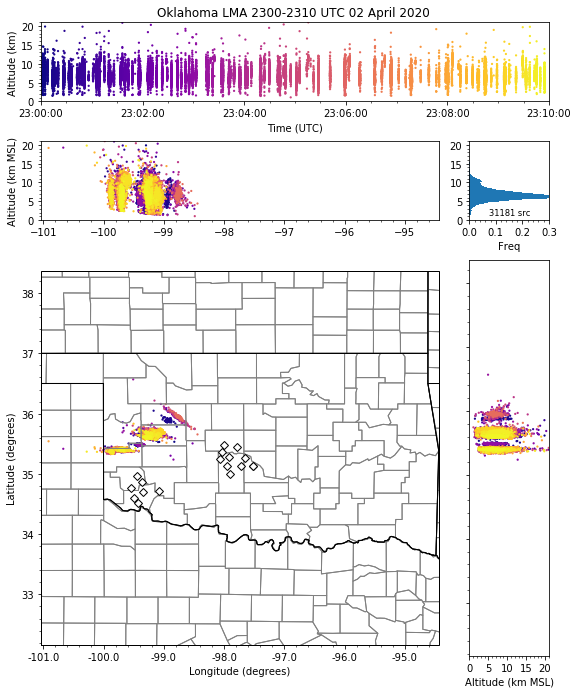

In [8]:
clat, clon = 35.26707931, -97.73839823
xlim = [clon-3.3, clon+3.3]
ylim = [clat-3.1, clat+3.1]

try:
    del(xp)
except:
    pass

xp = XlmaPlot(lma_data,dttuple[0],subplot_labels=False, bkgmap=True,
              readtype='pandas', cmap='plasma', s=5,
              zlim=[0, 21], chi2=1, normed=False,
              tlim=dttuple, xlim=xlim, ylim=ylim, title=tstring)

xp.ax_plan.plot(stations['Long'], stations['Lat'], 'wD', mec='k', ms=5)

# plt.savefig('./images/' + dttuple[0].strftime('%y%m%d') +
#             '/relampago_points_' + dttuple[0].strftime('%Y%m%d_%H%M.png'))

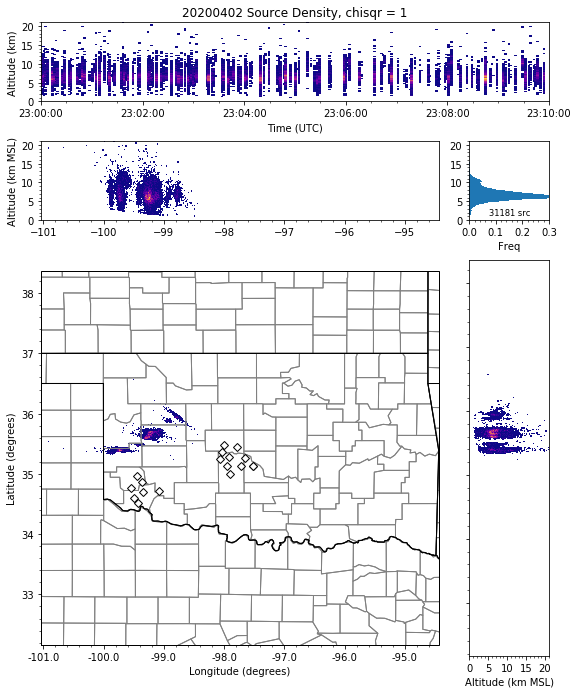

In [9]:
try:
    del(xp)
except:
    pass

xp = XlmaPlot(lma_data,dttuple[0],subplot_labels=False, bkgmap=True,
              readtype='pandas',  cmap='plasma', s=5, density=True,
              zlim=[0, 21], chi2=1, normed=True,
              tlim=dttuple, xlim=xlim, ylim=ylim)

xp.ax_plan.plot(stations['Long'], stations['Lat'], 'wD', mec='k', ms=5)

In [10]:
gsize = 0.025
lon_edges = np.arange(xlim[0],xlim[1],gsize)
lat_edges = np.arange(ylim[0],ylim[1],gsize)
# lat_c = (lat_edges[1:]+lat_edges[:-1])/2
# lon_c = (lon_edges[1:]+lon_edges[:-1])/2

glat_edges, glon_edges = np.meshgrid(lat_edges,lon_edges)

plan_hist, _, _ = np.histogram2d(lma_data.lon.values, lma_data.lat.values, 
               bins = [lon_edges,lat_edges])